In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_path = 'retail_sales_dataset.csv'  
data = pd.read_csv(file_path)

In [18]:
print("Dataset Head:")
print(data.head())

Dataset Head:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [19]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [20]:
numerical_data = numerical_data.dropna()

In [21]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

In [22]:
if normalized_data.shape[0] > 1 and normalized_data.shape[1] > 0:
    wcss = []
    for i in range(1, 11):
        try:
            kmeans = KMeans(n_clusters=i, random_state=42)
            kmeans.fit(normalized_data)
            wcss.append(kmeans.inertia_)
        except Exception as e:
            print(f"Error saat menjalankan KMeans dengan {i} cluster:", e)
else:
    print("Data tidak valid untuk clustering. Pastikan dataset memiliki data numerik yang cukup.")

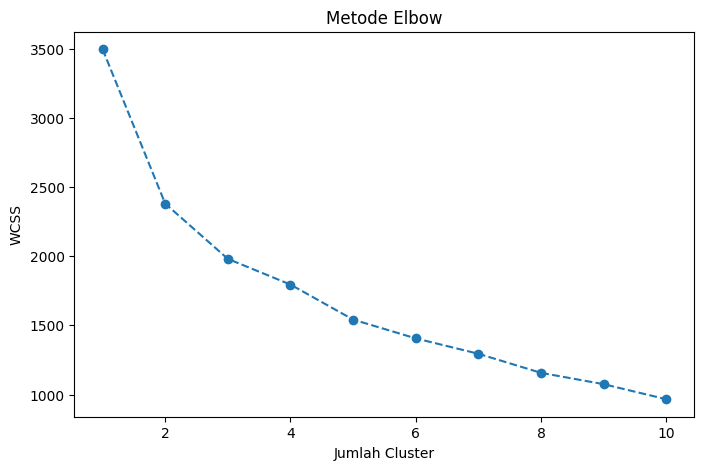

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [24]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

In [25]:
data['Cluster'] = cluster_labels

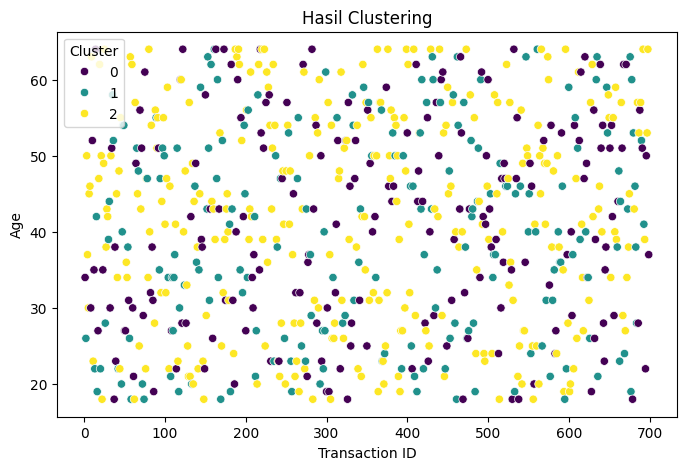

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=numerical_data.iloc[:, 0], y=numerical_data.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hasil Clustering')
plt.xlabel(numerical_data.columns[0])
plt.ylabel(numerical_data.columns[1])
plt.legend(title='Cluster')
plt.show()

In [27]:
data.to_csv('retail_sales_with_clusters.csv', index=False)
print("Hasil clustering disimpan ke file 'retail_sales_with_clusters.csv'")

Hasil clustering disimpan ke file 'retail_sales_with_clusters.csv'
